# 사물 이미지 분류 경진대회 Baseline1

이번 대회는 주어진 이미지의 종류를 분류하는 대회입니다. 

단순 이미지 분류 문제이지만 이미지 처리를 처음 시작하시는 분들은 아마도 막막하실 겁니다.

따라서 간단한 CNN 모델로 자동차, 말, 새 등 10가지 카테고리의 중 이미지들을 올바른 라벨로 분류하는 코드를 제공해드립니다.

베이스라인을 통해 이미지 처리 기초에 입문해보세요!

## Convolutional Neural Network(CNN)

코드로 들어가기 전 먼저 간단하게 CNN 모델을 이해하기 위한 기본 개념들을 둘러보겠습니다.

### Neural Network

인공지능에서 기본 개념으로 사용되는 인공신경망 뉴런은 생물학적 뉴런을 수학적으로 모델링한 것입니다.

인공신경망 뉴런은 여러 입력값을 받아 일정 수준을 넘어서게 되면 활성화되고 출력값을 내보냅니다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Neural_network.svg/1200px-Neural_network.svg.png?20210102213114" alt="neuralnetwork_image" height="700" width="600"/>

[이미지 출처](https://commons.wikimedia.org/wiki/File:Neural_network.svg)

#### Sigmoid

여기서 사용되는 함수가 바로 "Sigmoid"입니다.

sigmoid 함수는 활성화 함수(Activation function)로 많이 사용되며 보통 0.5 미만은 0, 이상은 1을 출력하게 됩니다.

#### sigmoid(x) = 1 / 1 + exp(-x)

그래프는 다음과 같습니다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Sigmoid-function-2.svg/1600px-Sigmoid-function-2.svg.png?20160528050132" alt="sigmoid_image" height="700" width="600"/>

[이미지 출처](https://commons.wikimedia.org/wiki/File:Sigmoid-function-2.svg)

그러나 이런 sigmoid 함수에는 단점이 있습니다. 

그래프를 보시면 양 극단 값의 기울기(미분값)이 0에 가까워져 학습이 되지 않는 문제가 발생합니다. 이를 Gradient Vanishing 문제라고 하는데 이러한 문제를 해결하기 위해 다양한 활성화 함수들이 고안되었습니다.

#### ReLU

ReLU 함수는 그렇게 고안된 활성화 함수 중 하나로, Gradient Vanishing 문제를 해결 가능합니다.

#### relu(x) = 0 if x < 0 else max(0,x)

위 식과 같이 ReLU 함수는 입력값을 0과 비교해 둘 중 큰 값을 출력합니다.

따라서 계산이 빠르고 양 극단값이 포화되지 않는다는 장점이 있습니다.

그러나 여전히 음수인 경우에는 0을 출력하여 학습이 이루어지지 않는다는 단점이 존재합니다.

<img src="https://www.researchgate.net/publication/340644173/figure/fig3/AS:880423093673984@1586920631034/4a-Graph-of-the-ReLU-function-4b-Graph-of-gradient-of-ReLU-function.ppm" alt="relu_image" height="700" width="600"/>

### Perceptron

퍼셉트론이란 신경망의 기원이 되는 개념으로, Frank Rosenblatt이 1957년 고안한 알고리즘입니다.

이는 여러 신호를 입력받아 0(흐르지 않는다) 또는 1(흐른다)이라는 출력값을 앞으로 전달합니다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Perceptron-unit.svg/1278px-Perceptron-unit.svg.png?20160606160836" alt="preceptron_image" height="700" width="600"/>

[이미지 출처](https://commons.wikimedia.org/wiki/File:Perceptron-unit.svg)


각 입력 신호 X는 각 가중치 w와 곱해집니다. 가중치가 클수록 그 신호가 중요하다는 뜻입니다.

그러나 퍼셉트론은 단순한 선형 분류기로, AND나 OR과 같은 분류는 가능하나 XOR 분류는 불가능합니다.


### MLP(Multi-Layer Perceptron)

직선형 영역만 표시할 수 있는 단층 퍼셉트론의 한계를 극복하기 위해 고안된 것이 다층 퍼셉트론입니다.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/28/MultiLayerPerceptron.png?20120416020124" alt="preceptron_image" height="700" width="600"/>

[이미지 출처](https://commons.wikimedia.org/wiki/File:MultiLayerPerceptron.png)

XOR 문제의 경우 각 영역을 직선으로 분리가 불가능한데, 비선형 영역까지 표현 가능한 다층 퍼셉트론으로 XOR 게이트까지 구현할 수 있습니다.

더 자세한 내용이 궁금하다면 [여기](https://brunch.co.kr/@gdhan/6)를 참고하세요!

## 환경 설정 및 데이터 로드

이제 분석할 데이터를 작업장으로 가져오겠습니다.

In [1]:
import os
import warnings
warnings.filterwarnings(action='ignore')

os.environ["CUDA_VISIBLE_DEVICES"]="0" # GPU 할당

In [2]:
#create training dataset
from glob import glob
import numpy as np
import PIL
from PIL import Image

# from keras.datasets import cifar10
# (training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

path = './data/train/'

training_images = []
training_labels = []

for filename in glob(path +"*"):
    for img in glob(filename + "/*.jpg"):
        an_img = PIL.Image.open(img) #read img
        img_array = np.array(an_img) #img to array
        training_images.append(img_array) #append array to training_images 
        label = filename.split('\\')[1] #get label
        training_labels.append(label) #append label
        
training_images = np.array(training_images)
training_labels = np.array(training_labels)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_labels= le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1,1)

print(training_images.shape)
print(training_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [3]:
# create test dataset

path = './data/test/'

test_images = []
test_idx = []

flist = sorted(glob(path + '*.jpg'))

for filename in flist:
    an_img = PIL.Image.open(filename) #read img
    img_array = np.array(an_img) #img to array
    test_images.append(img_array) #append array to training_images 
    
    label = filename.split('\\')[1] #get id 
    test_idx.append(label) #append id
    
test_images = np.array(test_images)

print(test_images.shape)
print(test_idx[0:5])

(10000, 32, 32, 3)
['0000.jpg', '0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg']


In [4]:
print(training_images.shape)
print(training_labels.shape)
print(test_images.shape)
print(test_idx[0:5])

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
['0000.jpg', '0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg']


불러온 데이터셋을 살펴보겠습니다.

[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],

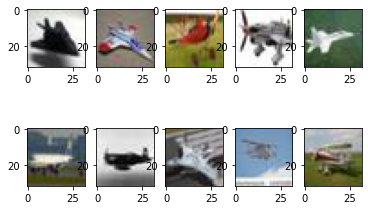

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(training_images[i])
    print(training_labels[i], end=",")
plt.show()

이미지를 살펴보면 10가지 종류의 이미지들이 존재하며 0부터 9까지 10개의 라벨이 달려있습니다. 

CIFAR-10 이미지 데이터셋을 분류하기 위해 CNN의 기본 개념을 이해하고 데이터셋에 적용해보도록 하겠습니다.

우리의 목표는 CNN 모델을 통해 10가지 종류의 이미지들을 각 레이블에 맞게 분류하는 것입니다.

## 데이터셋 준비
데이터셋을 X와 y로 분리하고, train 이미지 데이터셋을 학습용과 검증용으로 나누어줍니다.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(training_images, training_labels, test_size=0.2, random_state=42)

X_test = test_images

In [7]:
print('X_train 크기:',X_train.shape)
print('X_valid 크기:',X_valid.shape)
print('X_test  크기:',X_test.shape)

X_train 크기: (40000, 32, 32, 3)
X_valid 크기: (10000, 32, 32, 3)
X_test  크기: (10000, 32, 32, 3)


이미지의 RGB 채널은 각각 0~255까지의 값을 갖고 있기 때문에 

255로 나누어 0에서 1 사이 값을 갖도록 normalization을 해줍니다.

In [8]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

## CNN 모델 설계

필요한 layer들을 추가하며 CNN 모델을 설계합니다.

자세한 내용은 뒤에 이어서 설명하겠습니다.

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), #pooling layer
    tf.keras.layers.Dropout(0.23), # 무작위로 퍼셉트론 비활성화(23%)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.23),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.23),
    tf.keras.layers.Flatten(), # N차원 배열 -> 1차원 배열
    tf.keras.layers.Dense(1024, activation = 'relu'), #fully connected layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax') # ouput layer
])

이제 위 모델에서 사용한 각 Layer들에 대해 살펴보겠습니다.

### Convoultion Layer

Convolution Layer에서는 이미지의 특징(feature map)을 추출해내는 역할을 합니다.

입력 데이터가 주어지면 필터를 이용해 특징을 추출한 다음 아웃풋을 내보냅니다.

이 필터는 커널(Kernel) 혹은 가중치의 배열이라고도 부르며 이 값을 조정하는 것이 곧 학습을 의미합니다.

첫번째 Convolution Layer에서는 3x3 크기의 커널을 사용했습니다. 이는 곧 학습해야 할 가중치가 9개라는 뜻입니다.

* Stride

커널을 이동시키는 거리입니다. 특별한 언급이 없다면 1로 가정합니다.

Convolution을 하게되면 입력 데이터의 크기가 자연스럽게 줄어들게 되는데, 주변에 값이 0인 셀들을 추가(Padding)해서 입력 데이터의 크기를 유지시키기도 합니다.

[참고](https://hdevstudy.tistory.com/116)

* Padding

zero padding은 이미지 주위에 0을 둘러서 이미지 데이터의 축소를 방지해주는 역할을 합니다.

필터로 인해 특징이 추출되면 자연스럽게 크기가 작아지는데, 이미지 벡터들 가장자리에 0을 채워 Convolution Layer를 통과할 때 크기를 동일하게 유지시켜줄 수 있습니다.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/2d/Convolution_arithmetic_-_Padding_strides_odd.gif" />

### Pooling Layer - Max Pooling

Pooling Layer는 데이터의 공간적 크기를 축소하는데 사용합니다.

보통 이 레이어에서 이미지의 크기를 조절하며, CNN에서는 주로 Max-Pooling 방식을 사용합니다.

Conv layer 는 이미지의 특정 영역의 특징을 잡아내는 역할이라면, Pooling 은 이미지의 크기를 줄이는 동시에 이미지의 전체의 특징 또한 보존합니다. 

따라서 Pooling 은 모델로 하여금 이미지 전체를 볼 수 있게 도와줍니다.

Max Pooling에서는 선택된 영역에서 가장 큰 값을 뽑아 대표값으로 설정하는 방식입니다.

이를 통해 학습 시간을 단축하고 오버피팅 문제를 완화할 수 있습니다. 

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/Max_pooling.png?20151216202132" />


### Dropout

Drop Out 방식은 뉴럴 네트워크의 유닛(뉴런)들을 랜덤으로 비활성화 하여 과적합(Overfittng)을 방지하기 위한 기법입니다.

### Fully Connected Layer

*  Flatten Layer

N차원 배열을 1차원으로 변환합니다.

* Dense Layer 

1차원 배열을 뉴럴넷에 입력해 줍니다. 

이때, Dense Layer 는 오로지 퍼셉트론이로 이루어진 layer 입니다.


* Softmax

Softmax는 활성화 함수의 일종이며 마지막 layer 에서 class 별 확률를 출력하기 위해 사용됩니다. 

In [10]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

* Loss Functinon (손실 함수)

이때 Loss Function 은 실재 값과 모델이 예측한 값의 거리를 출력하는 함수 입니다.

쉽게 말해 Loss Function 은 모델의 예측이 얼마나 틀렸는지를 알려주는 함수 입니다.

이 때 "모델의 예측이 얼마나 틀렸는지" 를 어떻게 정의하느냐에 따라 어떤 Loss Function 을 사용할 지가 정해집니다.

----

이번 베이스라인에서는 최적화 함수로는 Adam 함수를 사용했고, 손실함수로는 'sparse_categorical_crossentropy', 그리고 평가지표로는 정확도를 사용했습니다.

모델을 완성했으면 summary() 함수를 통해 모델의 세부 내용를 요약 출력해봅니다.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 32)          0

## 학습
### batch size

batch size란 cpu 또는 gpu 연산 시, 하드웨어로 로드되는 데이터의 개수 입니다. 

본인의 컴퓨팅 환경에 따라 batch size 를 조절하는 것이 좋습니다. 

gpu 를 사용하는 경우 본인의 gpu 메모리 용량을 고려하여 batch size 를 설정해 주어야 합니다.

batch size 는 모델 학습 과정에 영향을 끼치기도 합니다. 

따라서 하드웨어 상황을 고려하면서도 학습 과정 또한 고려하여 batch size 를 설정해 주어야 합니다.

### epoch

딥러닝에서 epoch는 전체 트레이닝 셋이 신경망을 통과한 횟수입니다. 

1-epoch는 전체 트레이닝 셋이 하나의 신경망에 적용되어 순전파와 역전파를 통해 신경망을 한 번 통과했다는 뜻입니다.

epoch 은 많을 수록 학습이 잘되는 것이 아닙니다.

epoch 이 너무 적을 경우 학습이 덜 이루어지는 경우가 있고, epoch 이 너무 많을 경우 과적합이 되는 경우가 있습니다.

따라서 적절한 epoch 을 설정해 주어야 합니다. 

이때 validation loss 와 accuracy 은 epoch 을 언제 중단 할지 모니터링 하는 용도로 사용되기도 합니다.

자, 이제 CNN 모델 설계를 완료했으니 다음과 같이 배치 사이즈와 에폭을 설정하여 모델을 학습시키겠습니다.

In [12]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=128)

Epoch 1/10
313/313 [==============================] - 36s 111ms/step - loss: 1.7978 - accuracy: 0.3391 - val_loss: 1.5600 - val_accuracy: 0.4432
Epoch 2/10
313/313 [==============================] - 31s 100ms/step - loss: 1.4998 - accuracy: 0.4526 - val_loss: 1.4250 - val_accuracy: 0.4960
Epoch 3/10
313/313 [==============================] - 38s 122ms/step - loss: 1.3758 - accuracy: 0.5007 - val_loss: 1.2798 - val_accuracy: 0.5451
Epoch 4/10
313/313 [==============================] - 37s 119ms/step - loss: 1.2949 - accuracy: 0.5328 - val_loss: 1.1817 - val_accuracy: 0.5833
Epoch 5/10
313/313 [==============================] - 41s 131ms/step - loss: 1.2314 - accuracy: 0.5605 - val_loss: 1.1270 - val_accuracy: 0.6068
Epoch 6/10
313/313 [==============================] - 44s 139ms/step - loss: 1.1871 - accuracy: 0.5753 - val_loss: 1.0771 - val_accuracy: 0.6173
Epoch 7/10
313/313 [==============================] - 41s 131ms/step - loss: 1.1389 - accuracy: 0.5963 - val_loss: 1.0495 - val_ac

# 추론

In [13]:
pred_proba = model.predict(X_test) 

pred_class = []

for i in pred_proba:
    pred = np.argmax(i)
    pred_class.append(pred)
    
pred_class = le.inverse_transform(pred_class)
pred_class[0:5]

array(['horse', 'frog', 'truck', 'dog', 'airplane'], dtype='<U10')

# Dacon 대회 제출

In [18]:
import pandas as pd

sample_submission = pd.read_csv("./data/sample_submission.csv")

sample_submission.target = pred_class
sample_submission.to_csv("submit.csv",index=False)

FileNotFoundError: [Errno 2] No such file or directory: './data/sample_submission.csv'

In [ ]:
sample_submission.head()

이렇게 생성된 submission.csv 파일을 데이콘 대회 페이지에 업로드 & 제출하여 결과를 확인하세요.

축하합니다! 자연어 처리를 완료하셨습니다!
이미지 처리의 첫걸음을 떼신 것을 축하드립니다.

앞으로도 데이콘과 함께 즐겁게 데이터 분석 능력을 키워가시면 좋겠습니다.

감사합니다.